Cardiomegaly Dataset

In [211]:
#dependencies
import glob
import os


import networkx as nx
import matplotlib.pyplot as plt

import random
import matplotlib.image as mpimg

In [173]:
#cardiomegaly_data_set_path
cardiomegaly_dataSet=r'C:\Users\wbmad\Desktop\F21DL\Dubai_PG-3\CardiomegalyDataSet'


In [174]:
def read_data(dataSet_path):


#result
 result=[]
# get subdirectorylist
 directories=os.listdir(cardiomegaly_dataSet)
 
 for directory in directories:
    directory_path=os.path.join(cardiomegaly_dataSet,directory)
    for sub_directory in os.listdir(directory_path):
        sub_directory_path=os.path.join(directory_path,sub_directory)
        imgs=glob.glob(os.path.join(sub_directory_path,"*.png"))
        name=directory+"_"+sub_directory+"_images"
        label=directory+"_"+sub_directory+"_labels"
        name=[]
        name.extend(imgs)
        label=[]
        label.extend([sub_directory]*len(imgs))
        #print(directory+"_"+sub_directory+":"+str(len(imgs)))
        images={"class":directory+"_"+sub_directory+"_images","values":imgs}
        labels={"class":directory+"_"+sub_directory+"_labels","values":label}
        result.append(images)
        result.append(labels)

    
 return result     

In [175]:
data=read_data(cardiomegaly_dataSet)

In [201]:
train_true_images=[]
train_true_labels=[]
train_false_images=[]
train_false_labels=[]
test_true_images=[]
test_true_labels=[]
test_false_images=[]
test_false_labels=[]


for d in data:
    if "train_true_images" in d["class"]:
        train_true_images.extend(d["values"])
    elif "train_true_labels" in d["class"]:
        train_true_labels.extend(d["values"])
    elif "train_false_images" in d["class"]:
        train_false_images.extend(d["values"])
    elif "train_false_labels" in d["class"]:
        train_false_labels.extend(d["values"])
    elif "test_true_images" in d["class"]:
        test_true_images.extend(d["values"])
    elif "test_true_labels" in d["class"]:
        test_true_labels.extend(d["values"])
    elif "test_false_images" in d["class"]:
        test_false_images.extend(d["values"])
    elif "test_false_labels" in d["class"]:
        test_false_labels.extend(d["values"])
        

In [202]:
#get image count
total=0
for d in data:
    if "images" in d["class"]:
     total+=(len(d["values"]))
     print(d["class"]+":"+str(len(d["values"]))) 
print(total)

test_false_images:557
test_true_images:557
train_false_images:2219
train_true_images:2219
5552


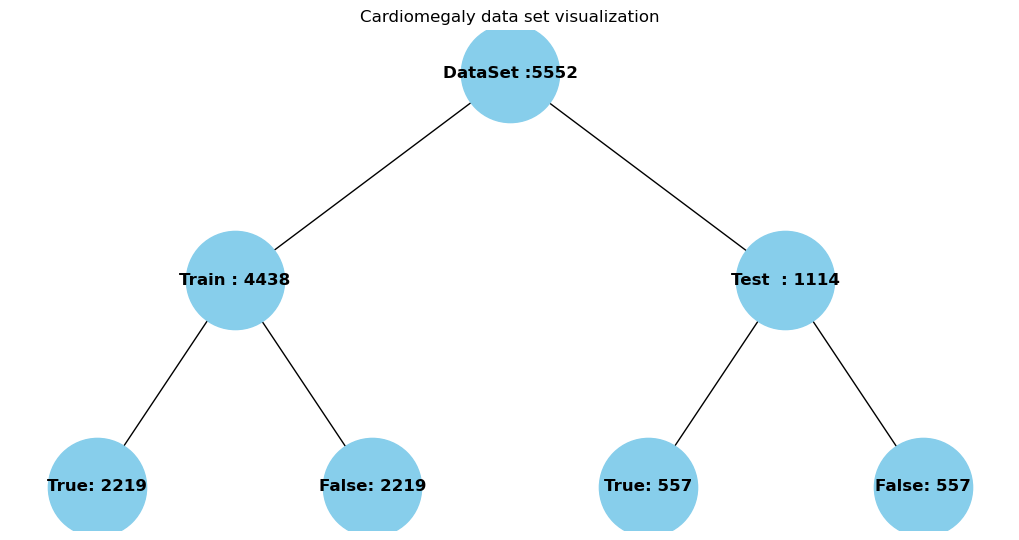

In [203]:
G=nx.Graph()
G.add_node("DataSet :"+str(total))
G.add_node("Train : 4438")
G.add_node("Test  : 1114")
G.add_edges_from([("DataSet :"+str(total),"Train : 4438"),("DataSet :"+str(total),"Test  : 1114")])
#train
G.add_node("True: 2219")
G.add_node("False: 2219")
G.add_edges_from([("Train : 4438","True: 2219"),("Train : 4438","False: 2219")])

#test
G.add_node("True: 557")
G.add_node("False: 557")
G.add_edges_from([("Test  : 1114","True: 557"),("Test  : 1114","False: 557")])

#positions
pos={"DataSet :"+str(total):(0,3),
     "Train : 4438":(-2,2),
     "Test  : 1114":(2,2),
     "True: 2219":(-3,1),
     "False: 2219":(-1,1),
     "True: 557":(1,1),
     "False: 557":(3,1),
     
    }

plt.figure(figsize=(10,5))
nx.draw(G,pos,with_labels="true",node_color="skyblue",node_size=5000,font_color="black",font_weight="bold")
plt.title("Cardiomegaly data set visualization")
plt.show()


In [221]:
def show_sample_images(case,images,labels,numOfSamples):
    sampleIndices=random.sample(range(len(images)),numOfSamples)
    sampleImages=[images[sampleIndex] for sampleIndex in sampleIndices]
    samplelabels=[labels[sampleIndex] for sampleIndex in sampleIndices]

    figure,axes=plt.subplots(1,numOfSamples,figsize=(10,10))
    for i,(image,label) in enumerate(zip(sampleImages,samplelabels)):
        img=mpimg.imread(image)
        axes[i].imshow(img,cmap='gray')
        axes[i].axis("off")
        axes[i].set_title(f"{label}\n{os.path.basename(image)}",fontsize=10)

    plt.tight_layout()
    plt.show()
    
  

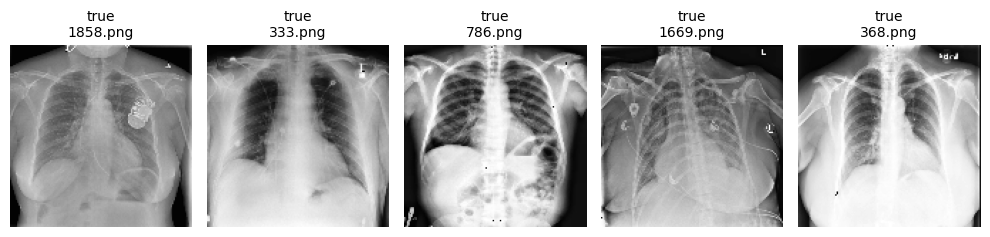

In [222]:
#show true images from train set
show_sample_images("true",train_true_images,train_true_labels,5)

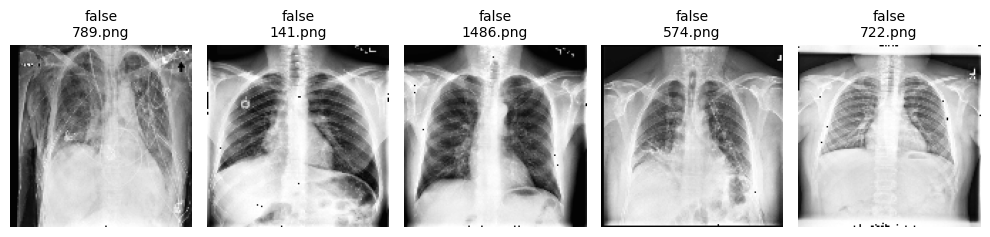

In [223]:
#show false images from train set
show_sample_images("Flase",train_false_images,train_false_labels,5)

In [224]:
def draw_pie_plot():
     # Data for pie charts
    trainCounts = [len(train_true_images), len(train_false_images)]
    testCounts = [len(test_true_images), len(test_false_images)]
    
    labels = ['True', 'False']
    
    fig, axes = plt.subplots(1, 2, figsize=(6, 6))  # Two subplots side by side
    
    #pie chart for tgrain set
    axes[0].pie(trainCounts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
    axes[0].set_title('Train Set')
    
    # pie chart for test set
    axes[1].pie(testCounts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
    axes[1].set_title('Test Set')
    
    plt.tight_layout()
    plt.show()


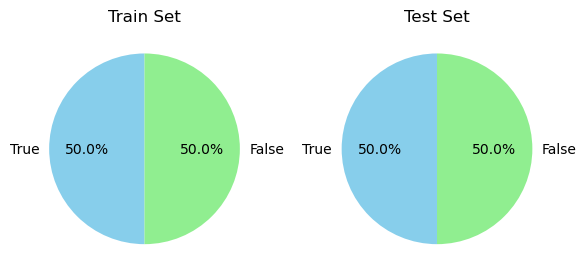

In [225]:
draw_pie_plot()